In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter

from functools import reduce
from wordcloud import WordCloud
%matplotlib inline

In [4]:
from konlpy.tag import Okt

In [5]:
base_path = './gdrive/My Drive/Colab Notebooks'

In [1]:
data_in_path = base_path + './data_in/'
data_out_path = base_path + './data_out/'

In [6]:
if not os.path.exists(data_in_path):
    os.makedirs(data_in_path)
    
if not os.path.exists(data_out_path):
    os.makedirs(data_out_path)

### Get data (https://github.com/songys/Chatbot_data)

In [22]:
!wget -P /content/gdrive/My Drive/Colab Notebooks/Data/\
https://raw.githubusercontent.com/changwookjun/learningspoons/master/Data/ChatBotData.csv

--2019-09-22 20:36:23--  https://raw.githubusercontent.com/changwookjun/learningspoons/master/Data/ChatBotData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.72.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.72.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 889842 (869K) [text/plain]
Saving to: ‘./data_in/ChatBotData.csv.1’

ChatBotData.csv.1   100%[===================>] 868.99K   152KB/s    in 5.9s    

2019-09-22 20:36:30 (147 KB/s) - ‘./data_in/ChatBotData.csv.1’ saved [889842/889842]



### EDA

In [23]:
data = pd.read_csv(data_in_path + 'ChatBotData.csv')

In [27]:
print(f'total data length: {len(data)}')
data.head()

total data length: 11823


,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [25]:
sentences = list(data['Q']) + list(data['A'])
print(sentences[1])

1지망 학교 떨어졌어


In [28]:
print(len(sentences))

23646


In [34]:
list(sentences[0])

['1', '2', '시', ' ', '땡', '!']

In [36]:
okt = Okt()
tokenized_by_space = [s.split() for s in sentences]
tokenized_by_morph = [okt.morphs(s) for s in sentences]
tokenized_by_char = [list(s) for s in sentences]

/Users/chojunghyun/anaconda3/envs/tensorflow/lib/python3.6/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [37]:
eojeol_length = [len(s) for s in tokenized_by_space] 
morph_length = [len(s) for s in tokenized_by_morph]
eumjeol_length = [len(s) for s in tokenized_by_char]

In [42]:
list(map(print, sentences[:3]))
print(eojeol_length[:3])
print(morph_length[:3])
print(eumjeol_length[:3])

12시 땡!
1지망 학교 떨어졌어
3박4일 놀러가고 싶다
[2, 3, 3]
[3, 4, 6]
[6, 11, 12]


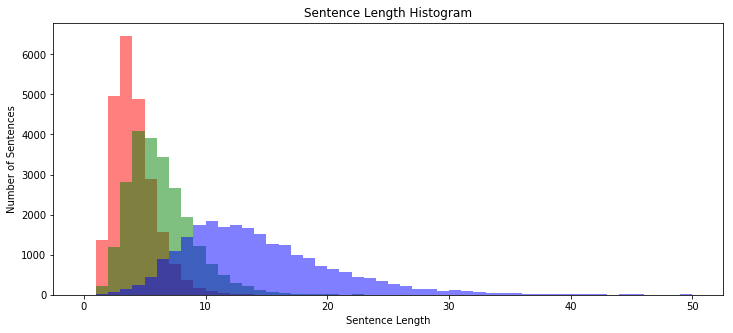

In [55]:
plt.figure(figsize=(12, 5))
plt.hist(eojeol_length, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(morph_length, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(eumjeol_length, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
None

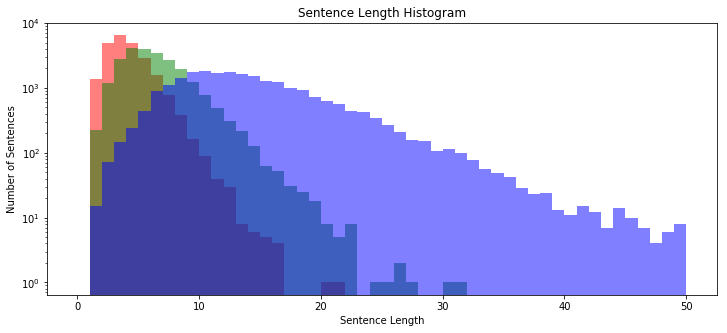

In [56]:
plt.figure(figsize=(12, 5))
plt.hist(eojeol_length, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(morph_length, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(eumjeol_length, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
None

In [48]:
print(f'어절 최대길이: {np.max(eojeol_length)}')
print(f'어절 최소길이: {np.min(eojeol_length)}')
print(f'어절 평균길이: {np.mean(eojeol_length):.2f}')
print(f'어절 길이 표준편차: {np.std(eojeol_length):.2f}')
print(f'어절 중간길이: {np.median(eojeol_length)}')
print(f'제 1 사분위 길이: {np.percentile(eojeol_length, 25)}')
print(f'제 3 사분위 길이: {np.percentile(eojeol_length, 75)}')

어절 최대길이: 21
어절 최소길이: 1
어절 평균길이: 3.64
어절 길이 표준편차: 1.74
어절 중간길이: 3.0
제 1 사분위 길이: 2.0
제 3 사분위 길이: 5.0


In [50]:
print(f'형태소 최대길이: {np.max(morph_length)}')
print(f'형태소 최소길이: {np.min(morph_length)}')
print(f'형태소 평균길이: {np.mean(morph_length):.2f}')
print(f'형태소 길이 표준편차: {np.std(morph_length):.2f}')
print(f'형태소 중간길이: {np.median(morph_length)}')
print(f'제 1 사분위 길이: {np.percentile(morph_length, 25)}')
print(f'제 3 사분위 길이: {np.percentile(morph_length, 75)}')

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.83
형태소 길이 표준편차: 2.71
형태소 중간길이: 5.0
제 1 사분위 길이: 4.0
제 3 사분위 길이: 7.0


In [51]:
print(f'음절 최대길이: {np.max(eumjeol_length)}')
print(f'음절 최소길이: {np.min(eumjeol_length)}')
print(f'음절 평균길이: {np.mean(eumjeol_length):.2f}')
print(f'음절 길이 표준편차: {np.std(eumjeol_length):.2f}')
print(f'음절 중간길이: {np.median(eumjeol_length)}')
print(f'제 1 사분위 길이: {np.percentile(eumjeol_length, 25)}')
print(f'제 3 사분위 길이: {np.percentile(eumjeol_length, 75)}')

음절 최대길이: 76
음절 최소길이: 1
음절 평균길이: 13.95
음절 길이 표준편차: 6.53
음절 중간길이: 13.0
제 1 사분위 길이: 9.0
제 3 사분위 길이: 17.0


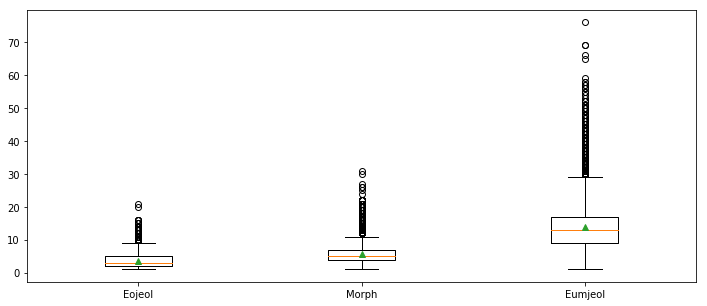

In [54]:
plt.figure(figsize=(12, 5))
plt.boxplot([eojeol_length, morph_length, eumjeol_length],
            labels=['Eojeol', 'Morph', 'Eumjeol'], 
            showmeans=True)
None

In [57]:
question_sentences = list(data['Q'])
answer_sentences = list(data['A'])

tokenized_by_morph_question = [okt.morphs(s) for s in question_sentences]
morph_length_question = [len(s) for s in tokenized_by_morph_question]

tokenized_by_morph_answer = [okt.morphs(s) for s in answer_sentences]
morph_length_answer = [len(s) for s in tokenized_by_morph_answer]

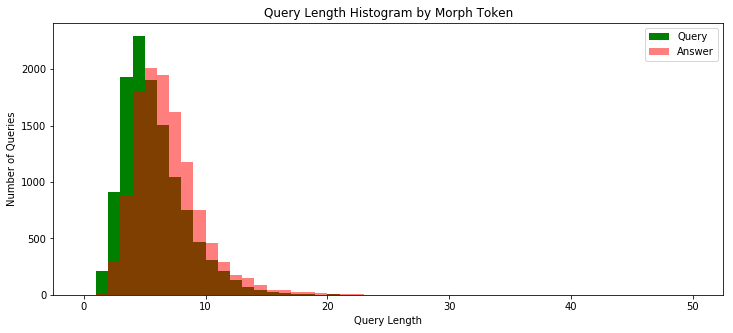

In [59]:
plt.figure(figsize=(12, 5))
plt.hist(morph_length_question, bins=50, range=[0,50], color='g', label='Query')
plt.hist(morph_length_answer, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')
None

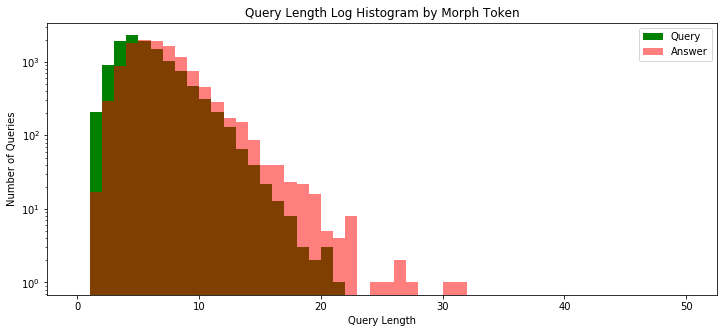

In [60]:
plt.figure(figsize=(12, 5))
plt.hist(morph_length_question, bins=50, range=[0,50], color='g', label='Query')
plt.hist(morph_length_answer, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.yscale('log', nonposy='clip')
plt.title('Query Length Log Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')
None

### 질문 분석

In [61]:
print(f'형태소 최대길이: {np.max(morph_length_question)}')
print(f'형태소 최소길이: {np.min(morph_length_question)}')
print(f'형태소 평균길이: {np.mean(morph_length_question):.2f}')
print(f'형태소 길이 표준편차: {np.std(morph_length_question):.2f}')
print(f'형태소 중간길이: {np.median(morph_length_question)}')
print(f'제 1 사분위 길이: {np.percentile(morph_length_question, 25)}')
print(f'제 3 사분위 길이: {np.percentile(morph_length_question, 75)}')

형태소 최대길이: 21
형태소 최소길이: 1
형태소 평균길이: 5.27
형태소 길이 표준편차: 2.54
형태소 중간길이: 5.0
제 1 사분위 길이: 3.0
제 3 사분위 길이: 7.0


### 답변 분석

In [62]:
print(f'형태소 최대길이: {np.max(morph_length_answer)}')
print(f'형태소 최소길이: {np.min(morph_length_answer)}')
print(f'형태소 평균길이: {np.mean(morph_length_answer):.2f}')
print(f'형태소 길이 표준편차: {np.std(morph_length_answer):.2f}')
print(f'형태소 중간길이: {np.median(morph_length_answer)}')
print(f'제 1 사분위 길이: {np.percentile(morph_length_answer, 25)}')
print(f'제 3 사분위 길이: {np.percentile(morph_length_answer, 75)}')

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 6.40
형태소 길이 표준편차: 2.76
형태소 중간길이: 6.0
제 1 사분위 길이: 4.0
제 3 사분위 길이: 8.0
